In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
    

In [2]:
# Importar el df
df = pd.read_csv('resultados_sentimientos_openai10.csv')

In [3]:
df

,Comentario,Sentimiento,Puntaje
0,Ayer desapareció este bolso en la terraza de l...,3,3
1,A las 22h...es el bingo mañana en la azohia .....,3 = Neutral,3
2,En isla plana hay hoy bingo en la asociación d...,3,3
3,"Hola. Conozco Isla Plana toda la vida, pero es...",5 = Muy positivo,5
4,We live here permanently and have noticed the ...,2,2
...,...,...,...
308,Valla marcha que hay por Dios,3,3
309,"¿Sueñas con escribir, pero no sabes por dónde ...",4,4
310,¿Qué te ofrecemos?,3 = Neutral,3
311,Ambiente inspirador: Rodéate de la belleza nat...,5 = Muy positivo,5


In [4]:
# Puntaje Medio de las opiniones
print(df['Puntaje'].mean())

3.0031948881789137


In [5]:
# SELECCIONAR TOP DE OPINIONES FILTRADAS
# Mejores opiniones: Solo puntuaciones mayores a 3
mejores_opiniones = df[df['Puntaje'] > 3].nlargest(10, 'Puntaje')

# Peores opiniones: Solo puntuaciones menores a 3
peores_opiniones = df[df['Puntaje'] < 3].nsmallest(10, 'Puntaje')

# IMPRIMIR TOP DE OPINIONES
# Top mejores opiniones
print('TOP MEJORES OPINIONES:\n')
for idx, row in mejores_opiniones.iterrows():
    print(f'Comentario {idx}: {row["Comentario"]}\n')
    print(f'Nota {row["Puntaje"]}\n\n')

# Top peores opiniones
print('TOP PEORES OPINIONES:\n\n')
for idx, row in peores_opiniones.iterrows():
    print(f'Comentario {idx}: {row["Comentario"]}\n')
    print(f'Nota {row["Puntaje"]}\n')


TOP MEJORES OPINIONES:

Comentario 3: Hola. Conozco Isla Plana toda la vida, pero es el primer año que veraneo aquí, y la verdad es que me han encantado sus fiestas, su gente, su playa, sus tardes interminables en los chiringuitos, las noches de bingo en la Asociación, los paseos con mi perro viendo el mar, que me hacían desconectar de todo, y todos los nuevos amigos que he conocido que me han hecho pasar ratos inolvidables. Este verano he sido muy feliz en Isla Plana, pero debo manifestar que me da mucha pena ve... Ver más

Nota 5


Comentario 15: preciosa su iglesia , en un enclave privilegiado .Muy bien cuidada .

Nota 5


Comentario 18: Vamos Pablo eres el mejor.....

Nota 5


Comentario 31: Gracias de nuevo por la ayuda y la generosidad  que desprenden nuestros vecinos y allegados,  a ADELA por la buena organización .

Nota 5


Comentario 61: Un bonito resumen de la belleza de nuestro paraíso

Nota 5


Comentario 71: Segunda noche en la plaza del mar de Isla plana y que deciros...

In [6]:
# Desglose del puntaje
puntaje = df['Puntaje'].value_counts()
print(puntaje)


Puntaje
3    221
4     36
2     33
1     12
5     11
Name: count, dtype: int64


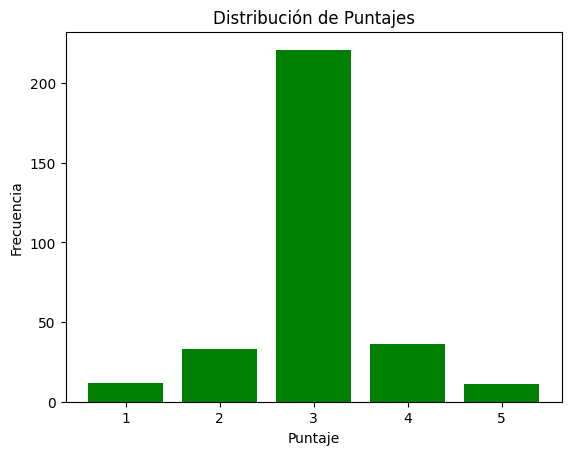

In [7]:
# Muestra la distribución del puntaje

puntaje = df['Puntaje'].value_counts()

# Extraer las frecuencias
frecuencias = puntaje.values
etiquetas = puntaje.index

# Graficar el histograma utilizando las frecuencias y etiquetas
plt.bar(etiquetas, frecuencias, color='g')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntajes')
plt.show()


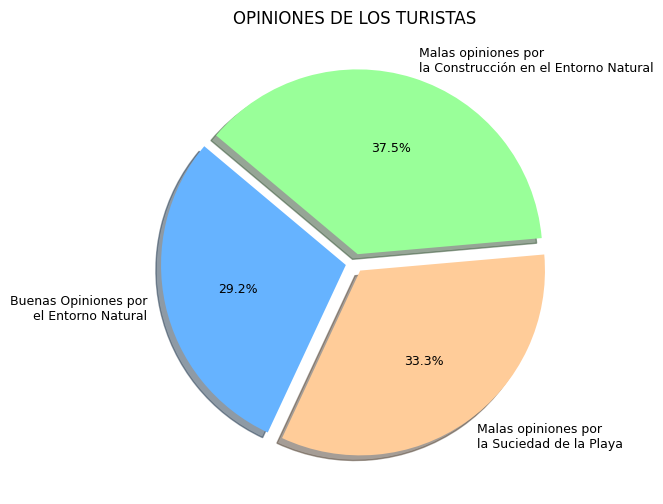

In [8]:
    df1 = pd.DataFrame(df)
    
    # Definir la variable explode para separar las porciones del gráfico
    explode = (0.05, 0.05, 0.05)  # Separar un poco cada porción
    
    # Definir palabras clave para cada tema
    palabras_entorno_natural = ['entorno', 'natural', 'hermoso', 'vista']
    palabras_suciedad_playa = ['sucia', 'abandonada', 'basura', 'limpieza']
    palabras_construccion = ['construcción', 'construyendo', 'destruyendo', 'palmeral']
    
    # Función para contar ocurrencias de palabras clave en los comentarios
    def contar_palabras(comentarios, palabras_clave):
        conteo = 0
        for comentario in comentarios:
            for palabra in palabras_clave:
                if palabra in comentario.lower():
                    conteo += 1
                    break  # Evitar contar múltiples veces en el mismo comentario
        return conteo
    
    # Contar ocurrencias de cada tema
    total_comentarios = len(df1)
    conteo_entorno_natural = contar_palabras(df1['Comentario'], palabras_entorno_natural)
    conteo_suciedad_playa = contar_palabras(df1['Comentario'], palabras_suciedad_playa)
    conteo_construccion = contar_palabras(df1['Comentario'], palabras_construccion)
    
    # Calcular porcentajes
    porcentaje_entorno_natural = (conteo_entorno_natural / total_comentarios) * 100
    porcentaje_suciedad_playa = (conteo_suciedad_playa / total_comentarios) * 100
    porcentaje_construccion = (conteo_construccion / total_comentarios) * 100
    
    # Crear gráfico de torta con los porcentajes calculados
    temas = ['Buenas Opiniones por\nel Entorno Natural', 'Malas opiniones por\nla Suciedad de la Playa', 'Malas opiniones por\nla Construcción en el Entorno Natural']
    porcentajes = [porcentaje_entorno_natural, porcentaje_suciedad_playa, porcentaje_construccion]
    
    # Colores personalizados para cada segmento
    colors = ['#66b3ff', '#ffcc99', '#99ff99']
    
    # Modificar el gráfico de pastel con ajustes en la distancia y tamaño de fuente
    plt.figure(figsize=(7, 6))
    plt.pie(porcentajes, labels=temas, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors, shadow=True,
           labeldistance=1.1, textprops={'fontsize': 9}) # Ajusta la distancia de etiquetas y el tamaño de la fuente
    plt.title('OPINIONES DE LOS TURISTAS')
    
    
    # Guardar el gráfico como archivo PNG
    plt.savefig('grafico_tematicas_opiniones.png')
    plt.show()


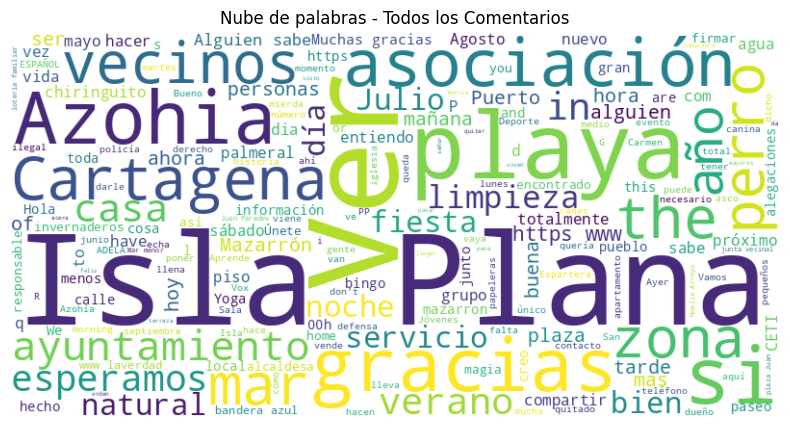

In [9]:
# NUBE DE PALABRA DE TODOS LOS COMENTARIOS

# Descargamos las stopwords en español de nltk
# nltk.download('stopwords')

# Obtener stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Crear una cadena con todos los comentarios
todos_los_comentarios = " ".join(row["Comentario"] for idx, row in df.iterrows())

# Crear la nube de palabras con todos los comentarios
nube_todos_comentarios = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_es).generate(todos_los_comentarios)

# Mostrar la nube de palabras para todos los comentarios
plt.figure(figsize=(10, 5))
plt.imshow(nube_todos_comentarios, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Todos los Comentarios")
plt.savefig("nube_de_palabras_todos_comentarios.png", format='png')
plt.show()


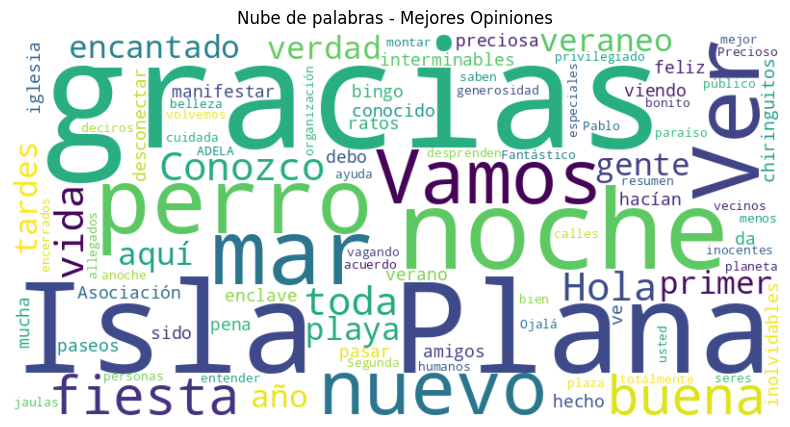

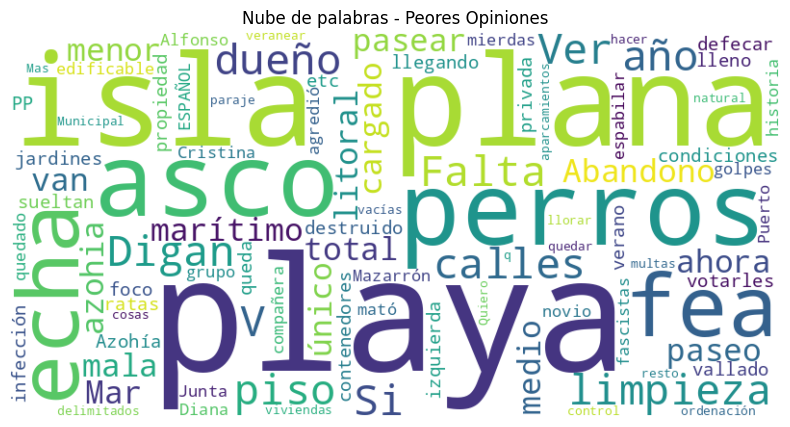

In [10]:
# NUBE DE PALABRAS DEL TOP DE COMENTARIOS

# SELECCIONAR TOP DE OPINIONES FILTRADAS
# Mejores opiniones: Solo puntuaciones mayores a 3
mejores_opiniones = df[df['Puntaje'] > 3].nlargest(10, 'Puntaje')

# Peores opiniones: Solo puntuaciones menores a 3
peores_opiniones = df[df['Puntaje'] < 3].nsmallest(10, 'Puntaje')

# Obtener stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Crear una nube de palabras para los mejores comentarios
mejores_texto = " ".join(row["Comentario"] for idx, row in mejores_opiniones.iterrows())
nube_mejores = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_es).generate(mejores_texto)

# Crear una nube de palabras para los peores comentarios
peores_texto = " ".join(row["Comentario"] for idx, row in peores_opiniones.iterrows())
nube_peores = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_es).generate(peores_texto)

# Mostrar la nube de palabras para los mejores comentarios
plt.figure(figsize=(10, 5))
plt.imshow(nube_mejores, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Mejores Opiniones")
plt.show()

# Mostrar la nube de palabras para los peores comentarios
plt.figure(figsize=(10, 5))
plt.imshow(nube_peores, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Peores Opiniones")
plt.show()


In [11]:
# SELECCIONAR TOP DE OPINIONES FILTRADAS
# Mejores opiniones: Solo puntuaciones mayores a 3
opiniones_nuetras = df[df['Puntaje'] == 3]


In [12]:
# IMPRIMIR TOP DE OPINIONES
# Top mejores opiniones
print('OPINIONES NUETRAS:\n')
for idx, row in opiniones_nuetras.iterrows():
    print(f'Comentario {idx}: {row["Comentario"]}\n')
    print(f'Nota {row["Puntaje"]}\n\n')

OPINIONES NUETRAS:

Comentario 0: Ayer desapareció este bolso en la terraza de la Asociación de Vecinos de Isla Plana. Si alguien lo encuentra (aunque sea entre los arbustos de alrededor) ruego lo comunique por aquí. Muchas gracias

Nota 3


Comentario 1: A las 22h...es el bingo mañana en la azohia .....

Nota 3


Comentario 2: En isla plana hay hoy bingo en la asociación de mayores y con bocadillos

Nota 3


Comentario 6: La Universidad de Murcia ha recibido el visto bueno para investigar en las islas e islotes de la #RegiónDeMurcia. El estudio, centrado en #AvesMarinas, #Rapaces ... Ver más

Nota 3


Comentario 8: ISLA PLANA.

Nota 3


Comentario 9: Si se me permite, me gustaría exponer algunas cosas de Isla Plana que considero  de gran importancia y que creo que quien sea el representante del Ayuntamiento de Cartagena debería hacer llegar a esta institución.

Nota 3


Comentario 10: 1. Pienso que es necesario continuar con la acera desde donde está la máquina expendedora de cebos qu